<a href="https://colab.research.google.com/github/naevs/Machine-Learning/blob/main/Naevin_MMAI_2024_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/MMAB/MMAI 869 2024: Individual Assignment

Version 1: Updated June 9, 2023

<font color='red'>\# TODO: fill in the below</font>

- [Naevin Abeyasekara]
- [20331748]
- [MMAI 869]
- [Opening the Door of Your Heart by Brahm, Ajahn]
- [07/01/2024]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2024_869_FirstnameLastName.pdf`
      - E.g., `2024_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-01-06 01:36:08.268411


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
!pip install category_encoders
!pip install seaborn
!pip install sklearn

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1 : KMeans

In [8]:
# TODO: Import the packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Whats our raw data like
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(n=20)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [10]:
# Create a StandardScalar object
scaler = StandardScaler()

# Normalize the Data
features = ['Age', 'Income', 'SpendingScore', 'Savings']
df1[features] = scaler.fit_transform(df1[features])


In [11]:
# Whats our normalized data like
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(n=10)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,6.683323e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.814031e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-2.814031e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-3.939643e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782
8,0.994363,-1.143838,-0.695375,0.590763
9,1.035829,-1.329920,-0.532121,1.216971


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


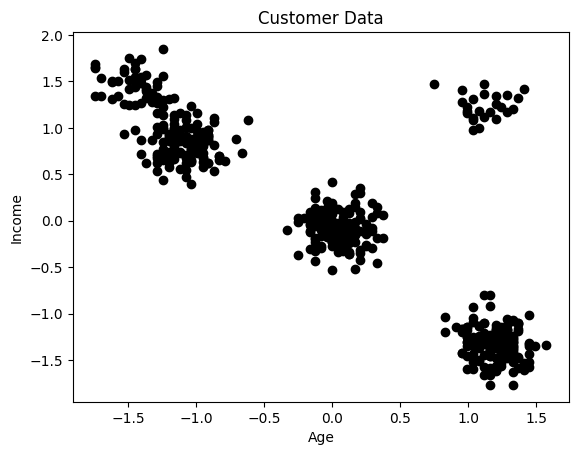

In [12]:
# Plot the Normalized Data for Visualisation
plt.figure();

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c="black");
plt.title("Customer Data");
plt.xlabel('Age');
plt.ylabel('Income');
plt.xticks();
plt.yticks();

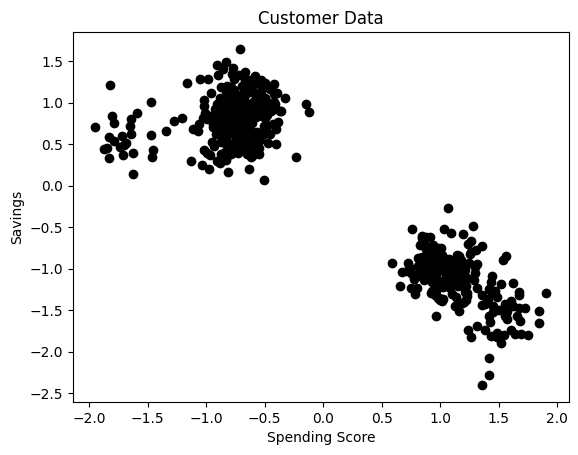

In [13]:
plt.figure();

plt.scatter(df1.iloc[:, 2], df1.iloc[:, 3], c="black");
plt.title("Customer Data");
plt.xlabel('Spending Score');
plt.ylabel('Savings');
plt.xticks();
plt.yticks();

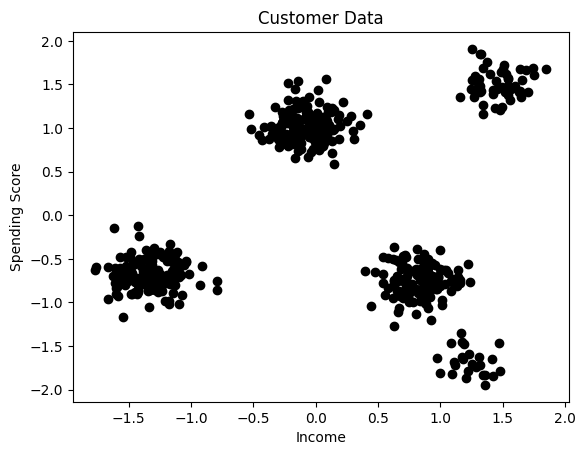

In [14]:
plt.figure();

plt.scatter(df1.iloc[:, 1], df1.iloc[:, 2], c="black");
plt.title("Customer Data");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

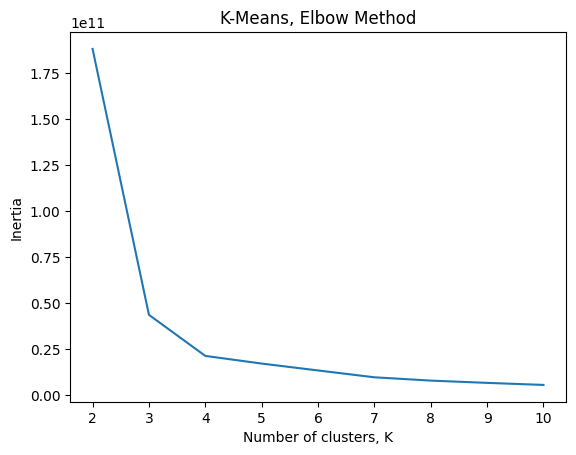

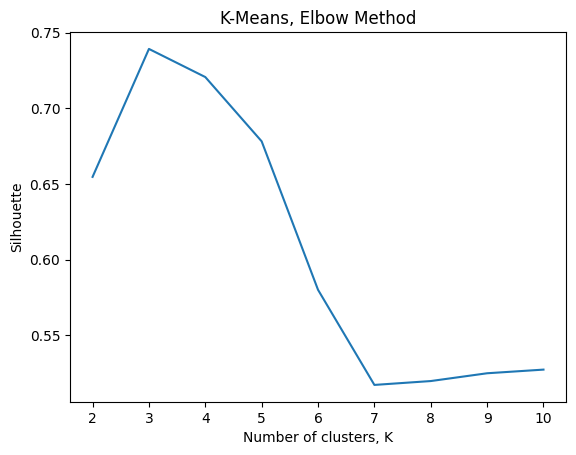

In [63]:
# Use Elbow Method to determine number of Clusters
import warnings
warnings.filterwarnings('ignore')

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    inertias[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


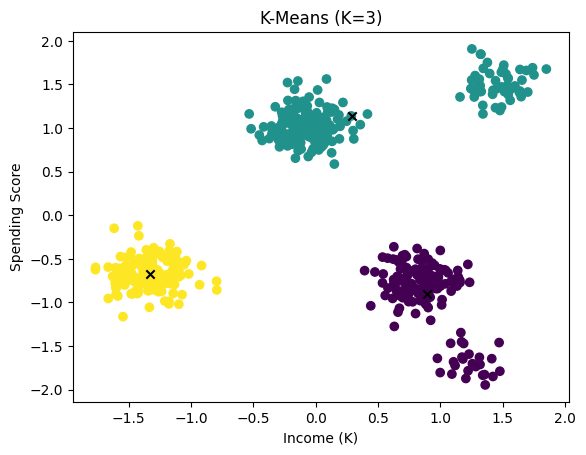

K=3, WCSS=384.81, Sil=0.70


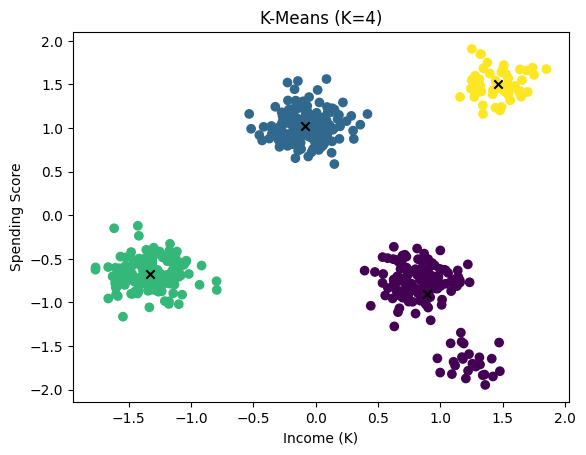

K=4, WCSS=189.70, Sil=0.76


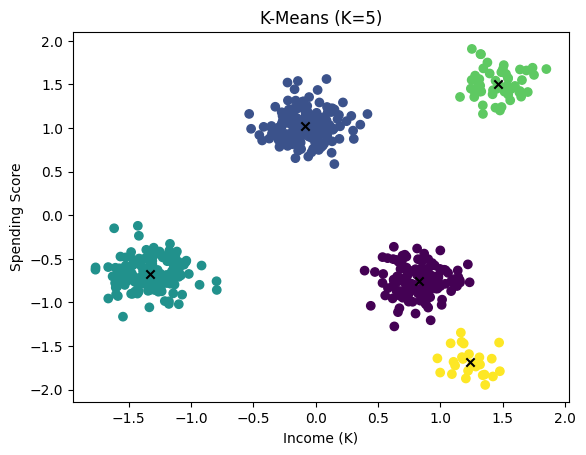

K=5, WCSS=66.51, Sil=0.80


In [16]:
# Based on the above Elbow Method Result, we will use a K range between 3 to 5

def do_kmeans(df1, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(df1)

    plt.figure();
    plt.scatter(df1.iloc[:, 1], df1.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()

    wcss = k_means.inertia_
    sil = silhouette_score(df1, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 6):
    do_kmeans(df1, k)

## 1.2: Clustering Algorithm #2 : DBSCAN

In [17]:
# TODO:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [19]:
# DBSCAN Clustering Algorithm
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.spatial.distance as sp

In [20]:
#Scale the data before applying DBSCAN to ensure that the scale of each variable is taken into account during clustering,.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

In [21]:
# Define the range of hyperparameters to search
eps_values = np.arange(0.1, 0.9, 0.1)
min_samples_values = range(2, 10)

In [22]:
ss = np.zeros((len(eps_values), len(min_samples_values)))

In [23]:
# Initialize best scores and parameters
best_silhouette_score = -1
best_ch_score = -1
best_eps_silhouette = best_eps_ch = None
best_min_samples_silhouette = best_min_samples_ch = None

In [24]:
# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)

        # Filter out noise points
        core_samples_mask = labels != -1
        labels_core = labels[core_samples_mask]
        features_core = scaled_features[core_samples_mask]

        # Skip if all points are labeled as noise or if only one cluster is found
        if len(set(labels_core)) <= 1:
            continue

        # Compute Silhouette Score
        silhouette = silhouette_score(features_core, labels_core)
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps_silhouette = eps
            best_min_samples_silhouette = min_samples

        # Compute Calinski-Harabasz Score
        ch_score = calinski_harabasz_score(features_core, labels_core)
        if ch_score > best_ch_score:
            best_ch_score = ch_score
            best_eps_ch = eps
            best_min_samples_ch = min_samples

print("Best Silhouette Score:", best_silhouette_score)
print("Best eps for Silhouette:", best_eps_silhouette)
print("Best min_samples for Silhouette:", best_min_samples_silhouette)
print("\n")
print("Best Calinski-Harabasz Score:", best_ch_score)
print("Best eps for Calinski-Harabasz:", best_eps_ch)
print("Best min_samples for Calinski-Harabasz:", best_min_samples_ch)

Best Silhouette Score: 0.8681318312149737
Best eps for Silhouette: 0.2
Best min_samples for Silhouette: 9


Best Calinski-Harabasz Score: 5362.521203276611
Best eps for Calinski-Harabasz: 0.2
Best min_samples for Calinski-Harabasz: 8


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different DBSCAN Parameters')

Text(0.5, 0, '(eps, min_samples)')

Text(0, 0.5, 'Silhouette Score')

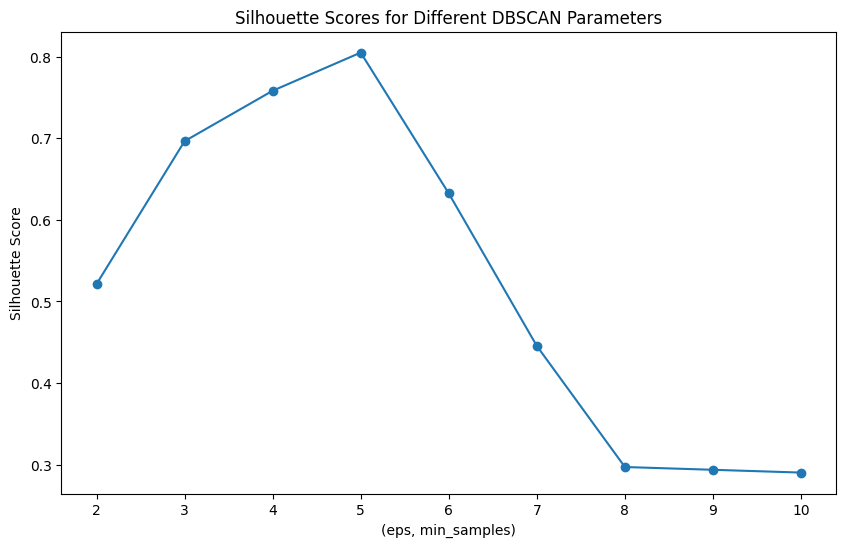

In [25]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plotting
plt.plot(list(silhouettes.keys()), list(silhouettes.values()), marker='o')

# Adding labels and title
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.xlabel('(eps, min_samples)')
plt.ylabel('Silhouette Score')

# Show the plot
plt.show()

In [26]:
# Create a DBSCAN instance based on best eps and min_samples
dbscan = DBSCAN(eps=0.2, min_samples=9)

# Fit the model
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to df1 DataFrame
df1['Cluster'] = clusters

# Count the unique labels, excluding the noise points labeled as -1
unique_clusters = np.unique(clusters[clusters != -1])

# Number of clusters is the length of the unique clusters excluding noise
num_clusters = len(unique_clusters)

# Print the number of clusters
print("Number of clusters:", num_clusters)

Number of clusters: 3


In [27]:
# Group by the 'Cluster' column and calculate mean and count
cluster_summary = df1.groupby('Cluster').agg(['mean', 'count'])
# Print the summary
print(cluster_summary)

               Age               Income       SpendingScore        \
              mean count           mean count          mean count   
Cluster                                                             
-1       55.031250   224   88291.674107   224      0.532263   224   
 0       59.326733   101   72043.712871   101      0.768643   101   
 1       88.029412   102   27848.254902   102      0.334947   102   
 2       32.141026    78  105640.256410    78      0.308236    78   

              Savings        
                 mean count  
Cluster                      
-1       10922.159793   224  
 0        6894.263501   101  
 1       16699.824732   102  
 2       14670.175422    78  


<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='Cluster'>

Text(0.5, 1.0, 'Relative Importance of Features by Cluster')

Text(0.5, 36.72222222222221, 'Feature')

Text(120.72222222222221, 0.5, 'Cluster')

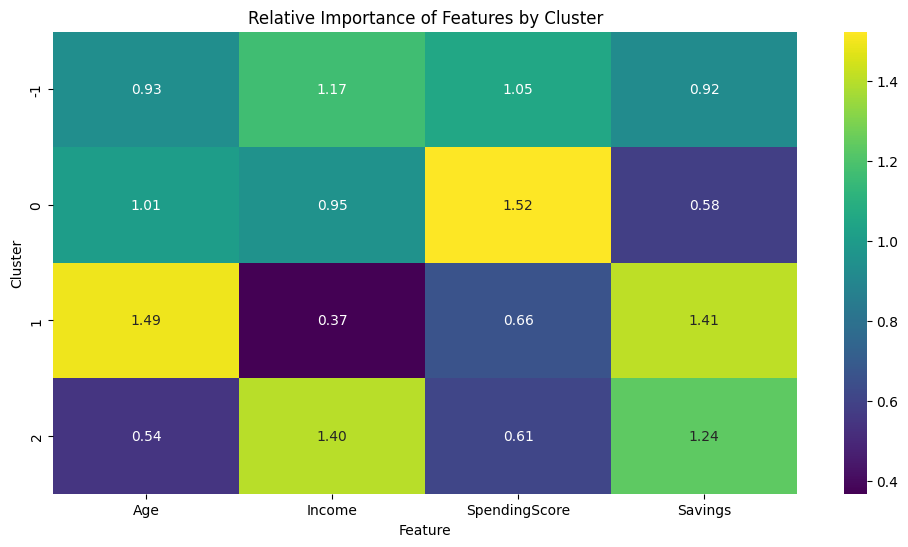

In [28]:
# Create a Relative Importance Plot by Cluster ID
# Calculate the mean of each feature for the entire dataset
overall_means = df1.drop('Cluster', axis=1).mean()

# Calculate the mean of each feature for each cluster
cluster_means = df1.groupby('Cluster').mean()

# Normalize the cluster means by the overall means
relative_importance = cluster_means / overall_means

# Create the heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(relative_importance, annot=True, cmap='viridis', fmt=".2f")
plt.title('Relative Importance of Features by Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [29]:
import scipy.spatial.distance
# Display an exemplar of the center most instance of each Cluster ID.
# Remove noise points (Cluster = -1)
df_clusters = df1[df1['Cluster'] != -1]

# Initialize an empty list to store the exemplars
exemplars = []

# Iterate over each cluster
for cluster in np.unique(df_clusters['Cluster']):
    # Filter the DataFrame for the current cluster
    cluster_data = df_clusters[df_clusters['Cluster'] == cluster]

    # Calculate pairwise distances within the cluster
    distances = scipy.spatial.distance.cdist(cluster_data.iloc[:, :-1], cluster_data.iloc[:, :-1], 'euclidean')
    # Calculate the average distance to other points in the cluster
    avg_distance = distances.mean(axis=1)

    # Find the index of the minimum average distance
    exemplar_index = avg_distance.argmin()

    # Get the exemplar row
    exemplar = cluster_data.iloc[exemplar_index]

    # Add the exemplar to the list
    exemplars.append(exemplar)

# Concatenate all exemplars into a DataFrame
exemplars_df = pd.concat(exemplars, axis=1).transpose()

# Reset index of the exemplars DataFrame
exemplars_df.reset_index(drop=True, inplace=True)

print(exemplars_df)

    Age    Income  SpendingScore       Savings  Cluster
0  64.0   71692.0       0.842652   7002.976554      0.0
1  94.0   28352.0       0.376876  16798.886115      1.0
2  30.0  106350.0       0.369416  14863.233588      2.0


## 1.3 Model Comparison

TODO:
>
</p>

>- KMeans Clustering had a Silhouette score of 0.80 whilst DBSCAN has a Silhouette score of 0.86. Both demonstrate a highquality cluster structure with DBSCAN performing slightly better. </p>

>- DBSCAN is a flexible algorithm that does not require the number of clusters to be specified beforehand, whilst KMeans you need to give a range atleast. As DBSCAN can handle noise and outliers well it identifies 3 clusters, whilst KMeans identifies 5 clusters.

>- KMeans was a simple and faster algorithm to run, compared to DBSCAN.</p>

In this instance for better data interpretability and ease of use, KMeans Cluster Algorithm would be a preferred choice for a Data scientist to quickly analyse the raw data set and provide a high level analysis of the data with clear visuals.

## 1.4 Personas

In [30]:
import sklearn.cluster as sc
agg = sc.AgglomerativeClustering(n_clusters=5)
cluster_labels = agg.fit_predict(df1)

# Add the cluster labels as a new column to your DataFrame
df1['ClusterID'] = cluster_labels

from scipy.stats import skew, kurtosis

# Define the aggregation dictionary
agg_funcs = {
    'Age': ['min', 'mean', 'max'],
    'Income': ['min', 'mean', 'max', 'var'],
    'SpendingScore': ['min', 'mean', 'max', 'var'],
    'Savings': ['min', 'mean', 'max', 'var'],
}

# Apply the aggregation functions to each cluster
cluster_stats = df1.groupby('ClusterID').agg(agg_funcs)

# Rename the columns for skewness and kurtosis
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# Optionally, you can reset the index to make 'ClusterID' a column again
cluster_stats.reset_index(inplace=True)

# Display the results
print(cluster_stats)

# Calculate the number of instances per cluster
instances_per_cluster = df1['ClusterID'].value_counts()

# Sort the counts by the cluster index if necessary
instances_per_cluster = instances_per_cluster.sort_index()

# Print the number of instances in each cluster
print(instances_per_cluster)

   ClusterID  Age_min   Age_mean  Age_max  Income_min    Income_mean  \
0          0       79  87.775510       97       12000   27866.102041   
1          1       22  33.601770       85       89598  103996.079646   
2          2       51  59.955414       68       56321   72448.063694   
3          3       17  24.180000       31      117108  128029.120000   
4          4       29  65.342105       93      112531  118698.315789   

   Income_max    Income_var  SpendingScore_min  SpendingScore_mean  \
0       46977  4.158709e+07           0.203140            0.328800   
1      111937  2.531993e+07           0.036795            0.304459   
2       90422  3.894084e+07           0.657314            0.771518   
3      142000  3.236364e+07           0.806553            0.896892   
4      128596  1.944609e+07           0.000000            0.167271   

   SpendingScore_max  SpendingScore_var   Savings_min  Savings_mean  \
0           0.473550           0.002045  13470.970605  16659.261445   
1   

In [31]:
# Define the aggregation dictionary
agg_funcs = {
    'Age': ['min', 'mean', 'max'],
    'Income': ['min', 'mean', 'max', 'var'],
    'SpendingScore': ['min', 'mean', 'max', 'var'],
    'Savings': ['min', 'mean', 'max', 'var']
}

# Apply the aggregation functions to each cluster
cluster_stats = df1.groupby('ClusterID').agg(agg_funcs)

# Flatten the MultiIndex columns
cluster_stats.columns = ['_'.join(col) if type(col) is tuple else col for col in cluster_stats.columns.values]

# Reset the index to make 'ClusterID' a column
cluster_stats = cluster_stats.reset_index()

# Calculate the number of instances per cluster and convert it to a DataFrame for merging
instances_df = df1['ClusterID'].value_counts().sort_index().reset_index()
instances_df.columns = ['ClusterID', 'NumberOfInstances']

# Merge the number of instances with the cluster stats DataFrame
cluster_stats = cluster_stats.merge(instances_df, on='ClusterID')

# Display the cluster statistics with the number of instances included
print(cluster_stats.to_string(index=False))

 ClusterID  Age_min  Age_mean  Age_max  Income_min   Income_mean  Income_max   Income_var  SpendingScore_min  SpendingScore_mean  SpendingScore_max  SpendingScore_var  Savings_min  Savings_mean  Savings_max  Savings_var  NumberOfInstances
         0       79 87.775510       97       12000  27866.102041       46977 4.158709e+07           0.203140            0.328800           0.473550           0.002045 13470.970605  16659.261445 20000.000000 1.401501e+06                147
         1       22 33.601770       85       89598 103996.079646      111937 2.531993e+07           0.036795            0.304459           0.411112           0.003357 12207.526078  15004.143428 17968.553929 1.182910e+06                113
         2       51 59.955414       68       56321  72448.063694       90422 3.894084e+07           0.657314            0.771518           0.910417           0.002121  4077.658657   6889.972190 10547.775368 1.107286e+06                157
         3       17 24.180000       31      

TODO:

#**Cluster 0: "Retired Professionals"**</p>

>
>- **Average Age :** 87 years old    </p>
>- **Income Level :** \$ 12,000 to \$ 46,977  </p>
>- **Average Savings :** \$16,659    </p>
>- **Cluster Size :** 147  </p>
>- **Persona :**Retired and most likely earning a pension, this consumer group is on a fixed income. The savings they have accumulated over the hard working years put them at the top of savings rank among other consumer clusters,they would not consider a frequent or adhoc visit to the jewelry store. However Uncle Steve can bundle certain jewelry items together and sell them as a package such as "Your granddaughters first prom". With targeted marketing campaigns on this cluster group, Uncle Steve can start seeing an uptick of sales from these type of customers as its the second largest segment.           </p>

#**Cluster 1:"Young Professionals"**</p>

>
>- **Average Age :** 33     </p>
>- **Income Level :** \$ 89,598 to \$ 111,937  </p>
>- **Average Savings :** \$15,004    </p>
>- **Cluster Size :** 113  </p>
>- **Persona :** Spend moderately and build wealth for the future, even then this group will spend on jewelry for special occasions such as their spouse's anniversary, Wedding/Engagement rings for a future fiance or just a nice ring for their special someone. Uncle Steve needs to be the shop where the ring comes from for these occasions inorder to be successful with this consumer group.       </p>

#**Cluster 2:"Mature Professionals"**</p>

>
>- **Average Age :** 60    </p>
>- **Income Level :** \$ 56,321 to \$ 90,422  </p>
>- **Average Savings :** \$ 6,889    </p>
>- **Cluster Size :** 157   </p>
>- **Persona :** Established and stable, this group takes the phrase "Work Hard,Play Hard" seriously. Even with a decent savings pot they will not shy away from dropping some cash on a shiny piece of jewelry from Uncle Steves shop for new featured pieces or even great value for money deals. As this is the largest cluster group, they are important to please.       </p>

#**Cluster 3:"Crazy Rich Professionals"**</p>

>
>- **Average Age :** 24   </p>
>- **Income Level :** \$ 117,108 to \$ 142,000  </p>
>- **Average Savings :** \$ 4,087 </p>
>- **Cluster Size :** 50   </p>
>- **Persona :** This consumer group earns the most and spends the most, also saves the least. Uncle Steve will need to have super luxury jewelry pieces in stock to get their attention.</p>

#**Cluster 4:"Wealthy Professionals"**</p>

>
>- **Age Range :** 65    </p>
>- **Income Level :** \$ 112,531 to \$ 128,596    </p>
>- **Average Savings :** \$ 14,738   </p>
>- **Cluster Size :** 38   </p>
>- **Persona :** Small but exclusive consumer group that accumulated wealth by always keeping a tight spending belt, and continue to do so even with higher incomes. Uncle Steve will find this group challenging to attract and may need to resort to deals or jewelry that he wants to clear inventory through price slashes if he is to see a single person from this customer group walk through his doors.</p>

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

TODO:

</p> Association Rule: {Milk} -> {Cereal} </p>

High Support: This rule has high support because both milk and cereal are staple Canadian household items, Otherwise why would Costco have bulk versions of Kellogs cereal and 4L Milk bags.

High Confidence: Milk and Cereal is a match made in heaven. All kids in Canada grew up having this first thing for breakfast, and no matter how old you get its still something you will think of having to start your day.</p>

To promote both 'Support' and 'Confidence' further. Apart from keeping both these items shelfed side by side, Uncle Steve may want to offer lactose free alternative choices and sugar free cereals to satisfy the health concious parents, and adults that still want to feel like they are eight again without the fear of diabetes.



## 2.2: A rule that might have reasonably high support but low confidence.

TODO:

</p> Association Rule: {Eggs} -> {Tuna} </p>

High Support: This rule has high support because both eggs and tuna are frequently bought items.

Low Confidence: Surely Canadians are not thinking of combining eggs and tuna, Unless they are me who loves to make a tuna omlette. So even if both items will be bought together in a number of transactions, it does not strongly imply the connection between the two items. </p>

To promote 'Support' Uncle Steve can offer Pasture Raised/Organic Eggs as consumers start getting better educated on this subject. Similar idea can be applied to Tuna to help boost sales. Now to promote 'Confidence' if Uncle Steve wants to give samples of my Tuna Omlette recipie for grocery shoppers to try, probably then we can observe an actual relationship grow to a high confidence.

## 2.3: A rule that might have low support and low confidence.

TODO:
</p> Association Rule: {Pickled onions} -> {Energy Drinks} </p>

Low Support: This rule has low support because pickled onions and energy drinks are not high priority items for your average canadian consumer, and hence won't be top selling items.

Low Confidence: Confidence will be low because the purchase of pickled onions which is a niche food that is distinct to a particular consumer taste/culture does not influence the purchase of energy drinks </p>

Uncle Steve may not be able to increase 'Confidence' unless there is sceintific proof that pickled onions + redbull when combined into a juice will actually make you fly. One of the ways Uncle Steve can increase the frequency of these items to promote 'Support' would be to offer them at discounted prices on a seasonal basis, curious Canadian shoppers won't walk away from discounted items even if they don't need it. A deal is a deal.

## 2.4: A rule that might have low support and high confidence.

TODO:
</p> Association Rule: {Pancake Batter} -> {Maple Syrup} </p>

Low Support: This rule has low support because even though both items are popular breakfast items. Consumers do not need to buy them frequently as they usually use the items for longer durations of time before they need to restock at Uncle Stevens Fine Foods.Now if this was Quebec we probably would have high support instead.

High Confidence: Nothing screams more Canadian than maple syrup on almost anything, especially on pancakes. So as consumers buy ready made pancake batter, they will also pickup a maple syrup in the same shopping trip </p>

Uncle Steve will be able to increase 'Confidence' and 'Support' by placing both items next to each other with a picture of a pancake topped up with maple syrup to enhance the visualisation exoerience and simplify the decision making process.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [51]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [52]:
#Import relevant packages
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [53]:
#Initial preprocessing and feature selection

# Convert 'DateOfBirth' Feature to Age
data=df3
current_year = datetime.now().year
data['Age'] = data['DateOfBirth'].apply(lambda dob: current_year - pd.to_datetime(dob).year)

#Drop features that won't add value to the baseline model
drop_columns = ['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Street','DateOfBirth']

# Drop the non-relevant features from both training and testing sets
data = data.drop(drop_columns, axis=1)


In [54]:
X = data.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = data['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

In [56]:
X = data.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = data['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Defining the model (using default parameters)
model = RandomForestClassifier(random_state=0)

In [58]:
# Perform 5-fold cross-validation on the training set
scores = cross_val_score(model, X, y, cv=5, scoring='f1')

# Print the results
print("F1 Scores for each fold:", scores)
print("Mean F1 Score:", scores.mean())

F1 Scores for each fold: [0.62809917 0.64566929 0.62992126 0.64623955 0.56989247]
Mean F1 Score: 0.6239643504341299


## 3.2: Adding feature engineering

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures


# Label encode the BadCredit column
le = LabelEncoder()
data['BadCredit'] = le.fit_transform(data['BadCredit'])

# Feature Engineering
# 1. Standard Scaling on numerical features
numerical_cols = ['Age', 'Amount', 'Married','PreviousDefault','NumberPets','PreviousAccounts','ResidenceDuration','Duration','City','Purpose']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 2. Polynomial Features: Creating interaction terms (degree=2)
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data[numerical_cols])
data = data.drop(numerical_cols, axis=1)
data = pd.concat([data, pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_cols))], axis=1)

# 3. PCA: Dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)
data = pd.concat([data, pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])], axis=1)

# Separating the features and the target variable
X = data.drop('BadCredit', axis=1)
y = data['BadCredit']

# Retraining the model with modified data
scores_with_feature_engineering = cross_val_score(model, X, y, cv=5, scoring=make_scorer(f1_score))

# Calculating the mean score
mean_score_with_feature_engineering = scores_with_feature_engineering.mean()
mean_score_with_feature_engineering

0.6355178194387003

Slight improvement in F1 score from 0.6239 to 0.6303. This indicated a positive impact of the feature engineering techniques applied. The use of StandardScaling and Polynomial Features helped the model to caputure complex relationships and interactions between variables.

## 3.3: Adding feature selection

In [60]:
from sklearn.feature_selection import SelectFromModel

# Use RandomForestClassifier for important feature selection
feature_selector = SelectFromModel(RandomForestClassifier(random_state=0))

# Apply feature selection
X_selected = feature_selector.fit_transform(X, y)

# Retrain the model with chosen features
scores_with_feature_selection = cross_val_score(model, X_selected, y, cv=5, scoring=make_scorer(f1_score))

# Calculating the mean score
mean_score_with_feature_selection = scores_with_feature_selection.mean()
mean_score_with_feature_selection

0.6286038752956046

A slight decrease in the mean F1 score to 0.6286, could indicate the process of choosing the features might have excluded some informative predictors, or the model is too simplified.

## 3.4: Adding hyperparameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object with RandomForestClassifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_selected, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score))

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 200},
 0.6353018355130039)

A much better improvement compared to feature selection, with the score around the same post feature engineering.This demonstrates the effectiveness of hyper parameter tuning for model perfromance enhancement.

## 3.5: Performance estimation on testing data

In [62]:
from sklearn.metrics import f1_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Training the model with the best parameters on the training data
optimized_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=1,
    random_state=0
)

optimized_model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = optimized_model.predict(X_test)

# Calculating the F1 score on the testing data
test_f1_score = f1_score(y_test, y_pred)
test_f1_score

RandomForestClassifier(min_samples_split=4, n_estimators=200, random_state=0)

0.6075268817204302

A slightly lower score which may indicate overfitting to the training data or a lack of generalization to unseen data. Overall the model has a good balance between precision and recall as per the F1 score. </p>

More tuning, feature selection and data gathering can help imporve the model.

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



TODO:

<u><strong>Cost Analysis</strong></u>

Without a predictive ML model Uncle Steve is going to spend **\$ 5,120,000**
(256 * \$ 20,000) every year assuming that out of the 700 turbines 256 of them will fail every year per his Random Forest model.</p>

Given that he follows his gut and goes with Random Forest he will incur a cost of only **\$ 1,627,500** per year as per the below calculation:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255,195 | </p>

</p>
Cost Incurred per Turbine

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$ 2,500 | \$ 20,000 |
| **Actual No Fail**   | \$ 500 | \$ 0 |

</p>
Total Cost Incurred
</p>

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$ 502,500 | \$ 1,100,000 |
| **Actual No Fail**   | \$ 25,000 | \$ 0 |

</p>

If Uncle Steve decides to go with the RNN model, he will incur a cost of
**\$ 1,765,000** per year as per the below calculation:</p>


|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1,200 | 254,045 | </p>

</p>
Cost Incurred per Turbine

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$ 2,500 | \$ 20,000 |
| **Actual No Fail**   | \$ 500 | \$ 0 |

</p>
Total Cost Incurred
</p>

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$ 565,500 | \$ 600,000 |
| **Actual No Fail**   | \$ 600,000 | \$ 0 |

<u><strong>Comparative Analysis</strong></u>

The Random Forest model has a higher F1 Score (0.792) because of its high precision (0.800) and recall (0.785), as opposed to RNN with a significantly lower F1 Score (0.268) even though its recall (0.882) is higher than Random Forest its precision (0.158) is quite low suggesting that it struggles to predict that a turbine will fail accurately. </p>

This is quite evident with the RNN model having a costlier False Positive of \$ 600,000 when compared to Random Forest with \$ 25,000. With a high difference of \$ 575,000 this could instead contribute to Uncle Steves bottom line of his tidy profits.</p>

<u><strong>Conclusion</strong></u>

The Random Forest model is well balanced and would be the preferred choice as it has a reliable prediction.
